![Diamante](https://www.lavanguardia.com/andro4all/hero/2024/01/diamante-perfecto.png?width=1200&aspect_ratio=9:2)

* Autor: Angel Gallozo
* Legajo:156308
* e-mail: luisangelgallozo@gmail.com

## Informacion Dataset
* carat: El peso del diamante, medido en quilates.
* cut: La calidad del corte del diamante, que puede ser, por ejemplo, "Ideal", "Premium", "Good", etc.
* color: La claridad del color del diamante, generalmente representada por una letra de la "D" (sin color) a la "Z" (color ligero).
* clarity: La claridad del diamante, que indica la presencia de imperfecciones o inclusiones, como "IF" (internamente impecable), "VVS1" (muy, muy pequeñas inclusiones 1), etc.
* depth: La profundidad total del diamante, expresada como un porcentaje de la altura del diamante dividido por su diámetro.
* table: La tabla del diamante, expresada como un porcentaje del ancho total de la parte superior del diamante en relación con su diámetro.
* price: El precio del diamante.
* x: Longitud en milímetros.
* y: Anchura en milímetros.
* z: Profundidad en milímetros

## Objetivo
* Construir un modelo de predictivo para el precio de diamantes

## Exploracion y Análisis de Datos

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [168]:
df_diamonds = pd.read_csv("./diamonds.csv")
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [169]:
df_diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [170]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Tenemos 3 variables categoricas y 10 numericas. Informacion importante para el escalado de las numéricas y conversión de las variables categoricas.

In [171]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

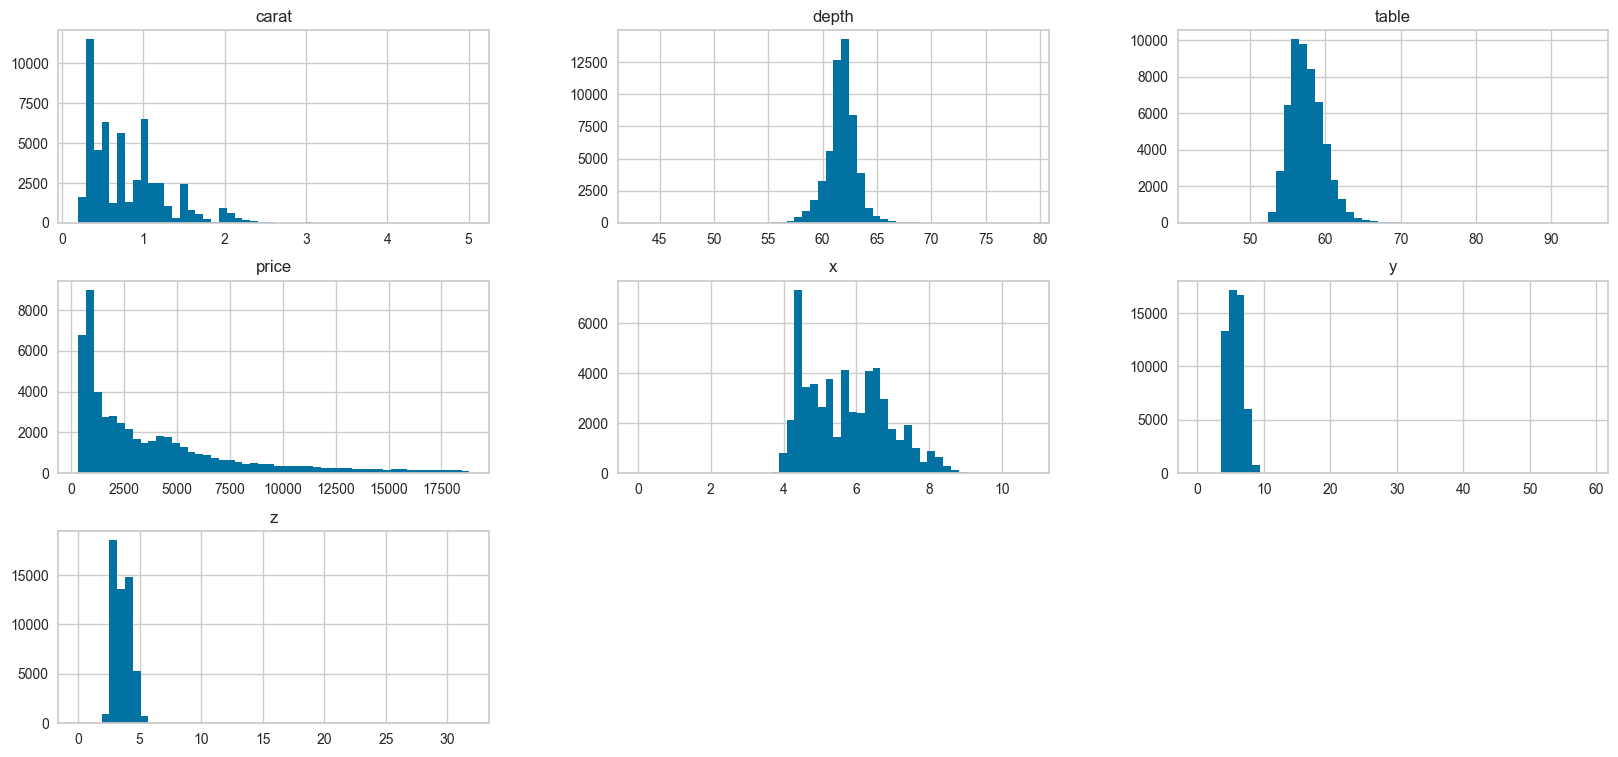

In [172]:
df_diamonds.hist(figsize=(20,9),bins=50)

Como vemos las variables numéricas tiene distintas escalas, por lo que antes de crear el modelo debemos trabajarlas.

In [173]:
df_diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No hay valores nulos, por lo que se descarta una tarea de imputacion.

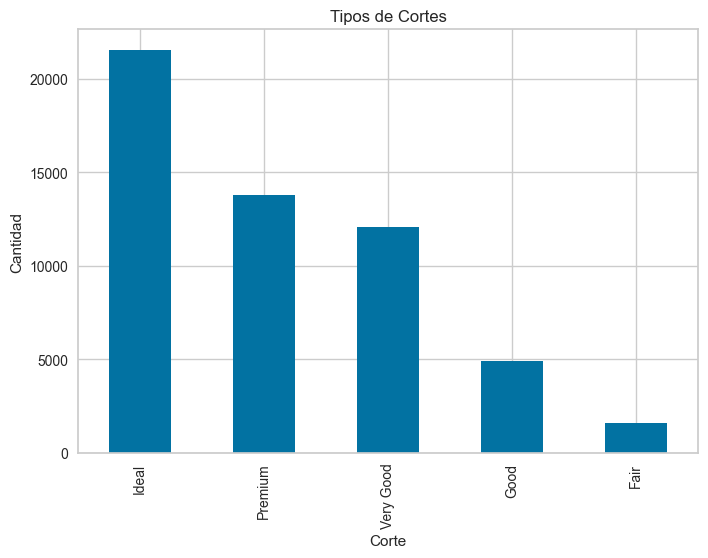

In [174]:
df_diamonds['cut'].value_counts().plot(kind='bar')

plt.xlabel('Corte')
plt.ylabel('Cantidad')
plt.title('Tipos de Cortes')

plt.show()

Text(0.5, 1.0, 'Tipos de Color')

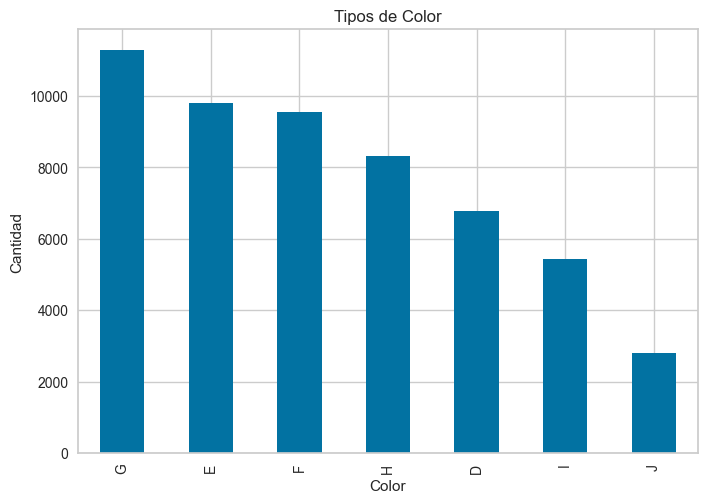

In [175]:
df_diamonds['color'].value_counts().plot(kind='bar')

plt.xlabel('Color')
plt.ylabel('Cantidad')
plt.title('Tipos de Color')


Text(0.5, 1.0, 'Tipos de Claridad')

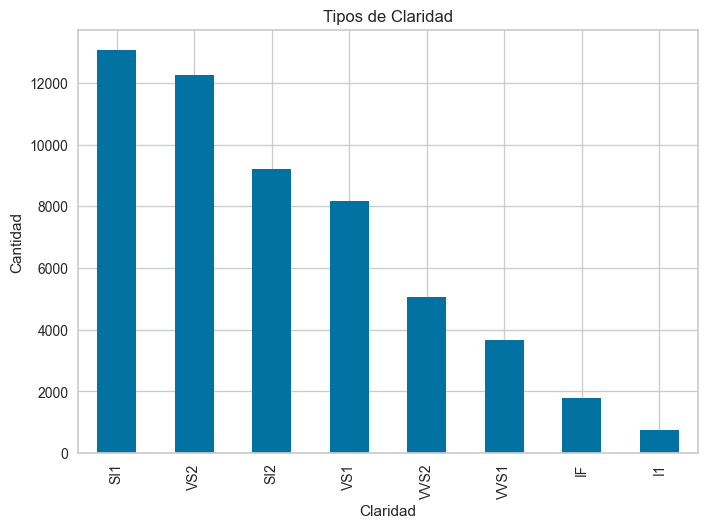

In [176]:
df_diamonds['clarity'].value_counts().plot(kind='bar')

plt.xlabel('Claridad')
plt.ylabel('Cantidad')
plt.title('Tipos de Claridad')


Luego de buscar info sobre diamantes, me di cuenta que las categorias del corte, claridad y color, tienen un orden implicito.

## Preprocesamiento

In [177]:
scaler = MinMaxScaler()

# Seleccionamos las columnas numéricas que queremos escalar
columns_to_scale = ['carat', 'depth', 'table', 'price','x','y','z']

# Escalamos las características seleccionadas
df_diamonds[columns_to_scale] = scaler.fit_transform(df_diamonds[columns_to_scale])
df_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,Ideal,E,SI2,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,Premium,E,SI1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,Good,E,VS1,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,Premium,I,VS2,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,Good,J,SI2,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...,...,...,...
53935,0.108108,Ideal,D,SI1,0.494444,0.269231,0.131427,0.535382,0.097793,0.110063
53936,0.108108,Good,D,SI1,0.558333,0.230769,0.131427,0.529795,0.097623,0.113522
53937,0.103950,Very Good,D,SI1,0.550000,0.326923,0.131427,0.527002,0.096435,0.111950
53938,0.137214,Premium,H,SI2,0.500000,0.288462,0.131427,0.572626,0.103905,0.117610


Procesamos las variables numericas para su escalado, se decide utilizar el MinMaxScaler porque este respeta mejor la forma de la distribución original.

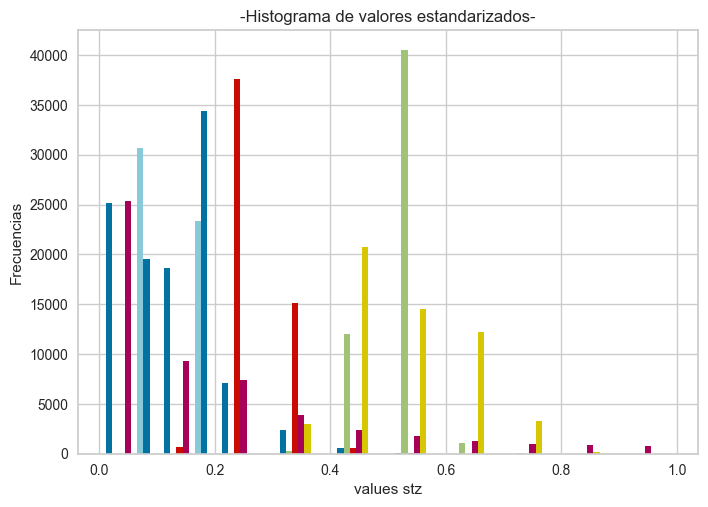

In [178]:
cats_escaladas = ['carat','depth','table','price','x','y','z']
plt.hist(x=df_diamonds[cats_escaladas],rwidth=0.75)
plt.title('-Histograma de valores estandarizados-')
plt.xlabel('values stz')
plt.ylabel('Frecuencias')
plt.show()

Ahora todos los atributos numéricos estan en la misma escala entre 0 y 1.

In [179]:
# Crear una instancia de OneHotEncoder
onehot_encoder = OneHotEncoder()

# Codificar las variables categóricas Clarity, Color y Cut
clarity_encoded = onehot_encoder.fit_transform(df_diamonds['clarity'].values.reshape(-1, 1)).toarray()
color_encoded = onehot_encoder.fit_transform(df_diamonds['color'].values.reshape(-1, 1)).toarray()
cut_encoded = onehot_encoder.fit_transform(df_diamonds['cut'].values.reshape(-1, 1)).toarray()

# Añadir las nuevas columnas al DataFrame
df_diamonds_encoded = df_diamonds.copy()
df_diamonds_encoded = pd.concat([df_diamonds_encoded, pd.DataFrame(clarity_encoded, columns=['clarity_' + str(i) for i in range(clarity_encoded.shape[1])])], axis=1)
df_diamonds_encoded = pd.concat([df_diamonds_encoded, pd.DataFrame(color_encoded, columns=['color_' + str(i) for i in range(color_encoded.shape[1])])], axis=1)
df_diamonds_encoded = pd.concat([df_diamonds_encoded, pd.DataFrame(cut_encoded, columns=['cut_' + str(i) for i in range(cut_encoded.shape[1])])], axis=1)

# Eliminar las columnas originales de categorías
df_diamonds_encoded.drop(['clarity', 'color', 'cut'], axis=1, inplace=True)

# Ver el DataFrame resultante
df_diamonds_encoded.head()

,carat,depth,table,price,x,y,z,clarity_0,clarity_1,clarity_2,...,color_2,color_3,color_4,color_5,color_6,cut_0,cut_1,cut_2,cut_3,cut_4
0,0.006237,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.002079,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.006237,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.018711,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.022869,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


En el caso de las variable categoricas, realizamos una conversión a numeros utilizando el OneHotEncoder, para crear una nueva columna binaria para cada categoría en la variable categórica.

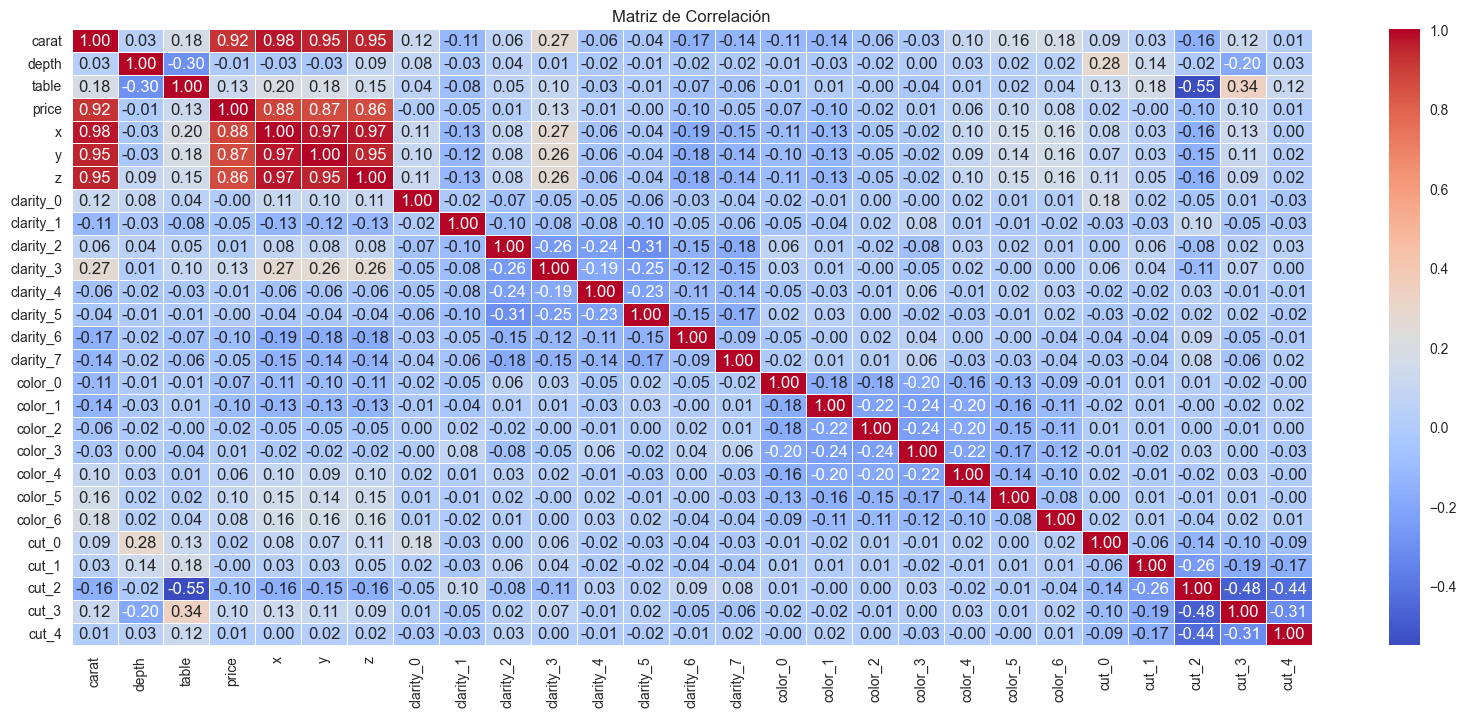

In [180]:
# Calcular la matriz de correlación
correlation_matrix = df_diamonds_encoded.corr()

# Crear el mapa de calor
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Vemos una fuerte relación entre el precio y:
* carat (peso)
* x
* y
* z

## Modelado

In [181]:
df_diamonds_encoded.head()

,carat,depth,table,price,x,y,z,clarity_0,clarity_1,clarity_2,...,color_2,color_3,color_4,color_5,color_6,cut_0,cut_1,cut_2,cut_3,cut_4
0,0.006237,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.002079,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.006237,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.018711,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.022869,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [182]:
#Separamos los datos de la variable objetivo
X = df_diamonds_encoded.drop("price",axis=1)
X

,carat,depth,table,x,y,z,clarity_0,clarity_1,clarity_2,clarity_3,...,color_2,color_3,color_4,color_5,color_6,cut_0,cut_1,cut_2,cut_3,cut_4
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.108108,0.494444,0.269231,0.535382,0.097793,0.110063,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53936,0.108108,0.558333,0.230769,0.529795,0.097623,0.113522,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
53937,0.103950,0.550000,0.326923,0.527002,0.096435,0.111950,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53938,0.137214,0.500000,0.288462,0.572626,0.103905,0.117610,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [183]:
#Variable Objetivo
y = df_diamonds_encoded['price']
y=pd.DataFrame(y)
y

,price
0,0.000000
1,0.000000
2,0.000054
3,0.000433
4,0.000487
...,...
53935,0.131427
53936,0.131427
53937,0.131427
53938,0.131427


## Experimentacion

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error

In [185]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2)

In [186]:
print("Tamaño set Training",X_train.shape)
print("Tamaño set Test",X_test.shape)

Tamaño set Training (43152, 26)
Tamaño set Test (10788, 26)


In [187]:
#Definimos modelo
modelo = LinearRegression()

In [188]:
#Entrenamos el modelo
modelo.fit(X_train,y_train)

LinearRegression()

In [189]:
#Coeficiente del modelo
modelo.coef_

array([[ 2.93903488e+00, -1.26900357e-01, -6.96219081e-02,
        -5.92842346e-01,  3.16648704e-03, -6.96474972e-02,
         3.77278463e+11,  3.77278463e+11,  3.77278463e+11,
         3.77278463e+11,  3.77278463e+11,  3.77278463e+11,
         3.77278463e+11,  3.77278463e+11,  4.38607083e+10,
         4.38607083e+10,  4.38607083e+10,  4.38607083e+10,
         4.38607083e+10,  4.38607083e+10,  4.38607083e+10,
         1.48875090e+10,  1.48875090e+10,  1.48875090e+10,
         1.48875090e+10,  1.48875090e+10]])

In [190]:
#Prediccion
y_pred=modelo.predict(X_test)

## Evaluacion

In [191]:
#Calculamos el error cuadratico medio y el estadistico R^2
print('Error cuadrático medio:%.5f' % mean_squared_error(y_test,y_pred))
print('Estadistico R_2: %.5f' % r2_score(y_test,y_pred))
print('Raiz Error cuadrático medio: %.5f' % root_mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: %.5f' % mean_absolute_error(y_test,y_pred))

Error cuadrático medio:0.00371
Estadistico R_2: 0.91808
Raiz Error cuadrático medio: 0.06094
Mean Absolute Error: 0.04021


* Error cuadrático medio (MSE): Este valor indica la cantidad promedio por la que las predicciones del modelo difieren de los valores reales al cuadrado. Un MSE bajo indica que el modelo tiene un buen ajuste a los datos, ya que las predicciones están muy cerca de los valores reales.

* Estadístico R^2 : Este valor proporciona una medida de qué tan bien las predicciones del modelo se ajustan a los datos reales. R^2 varía entre 0 y 1, donde 1 indica un ajuste perfecto. Un R^2 de 0.91 significa que aproximadamente el 91% de la variabilidad en la variable dependiente es explicada por el modelo, lo cual es muy bueno.

* Raíz del Error Cuadrático Medio (RMSE): La raíz del error cuadrático medio es la raíz cuadrada del MSE y proporciona una medida de cuánto difieren las predicciones del modelo de los valores reales en la misma escala que los datos originales. Un RMSE más bajo indica un mejor ajuste del modelo a los datos. Con un valor de 0.06 aproximadamente, las predicciones están en promedio a unos 0.06 unidades de distancia de los valores reales.

* Error Absoluto Medio (MAE): El error absoluto medio es la media de las diferencias absolutas entre las predicciones y los valores reales. Es una medida de la precisión promedio del modelo. Un MAE más bajo indica un mejor ajuste del modelo a los datos. Con un valor de 0.04, las predicciones tienen un error absoluto promedio de aproximadamente 0.04036 unidades.

In [192]:
y_test

,price
11336,0.252095
1687,0.146348
32387,0.025139
34437,0.029032
10756,0.244742
...,...
12059,0.014651
52855,0.121749
34063,0.028383
9464,0.231064


In [193]:
y_pred

array([[0.2723999 ],
       [0.18731689],
       [0.06652832],
       ...,
       [0.0090332 ],
       [0.19897461],
       [0.45526123]])

In [194]:
# Convertir el array y_pred a un DataFrame
df_actual_y_pred = pd.DataFrame(y_pred, columns=["predict"])
# Llenar el DataFrame vacío con los valores de df_price
df_actual_y_pred["actual"] = y_test["price"].values

df_actual_y_pred

,predict,actual
0,0.272400,0.252095
1,0.187317,0.146348
2,0.066528,0.025139
3,-0.084717,0.029032
4,0.286194,0.244742
...,...,...
10783,0.027283,0.014651
10784,0.124573,0.121749
10785,0.009033,0.028383
10786,0.198975,0.231064


<Axes: ylabel='Density'>

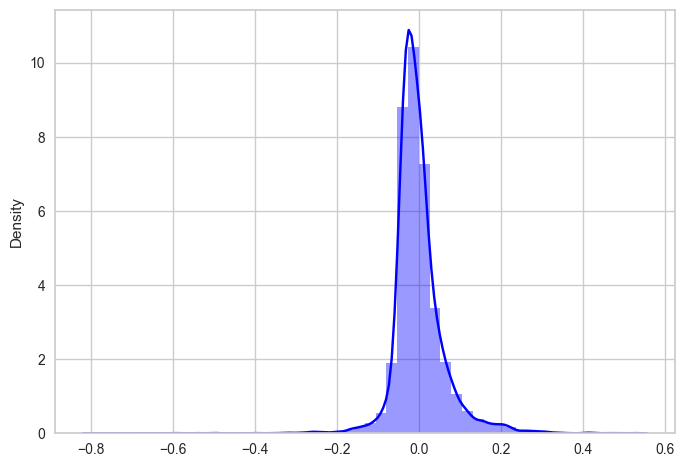

In [195]:
#Ploteamos la distribucion de los errores
error = df_actual_y_pred['actual']-df_actual_y_pred['predict']
sns.distplot(error,color='Blue')

<Axes: >

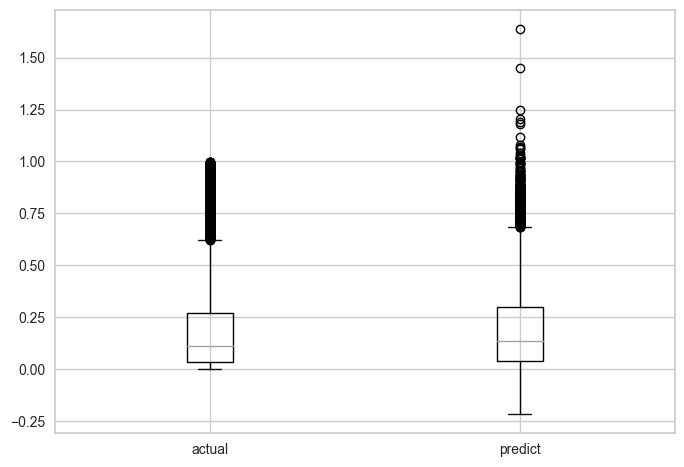

In [196]:
df_actual_y_pred.boxplot(column=['actual','predict'])

Como vemos los valores predichos no son muy diferentes a los reales.

### Utilizando Random Forest Regressor

In [197]:
from sklearn.ensemble import RandomForestRegressor

In [198]:
#Intanciamos el modelo
rfr_model = RandomForestRegressor(n_estimators=30)

In [199]:
#Entrenamos
rfr_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [200]:
#Prediccion
rfr_y_pred=rfr_model.predict(X_test)

In [201]:
#Calculamos el error cuadratico medio y el estadistico R^2
print('Error cuadrático medio:%.5f' % mean_squared_error(y_test,rfr_y_pred))
print('Estadistico R_2: %.5f' % r2_score(y_test,rfr_y_pred))
print('Raiz Error cuadrático medio: %.5f' % root_mean_squared_error(y_test,rfr_y_pred))
print('Mean Absolute Error: %.5f' % mean_absolute_error(y_test,rfr_y_pred))

Error cuadrático medio:0.00089
Estadistico R_2: 0.98043
Raiz Error cuadrático medio: 0.02979
Mean Absolute Error: 0.01474


Como se ve este modelo resulta ser mucho más efectivo para las predicciones del precio. Mejorando cada métrica.

### Random Forest Regressor + KFold Cross Validation

In [202]:
from sklearn.model_selection import cross_val_score, KFold

In [203]:
rfr_cv_model = RandomForestRegressor(n_estimators=30)
scores = cross_val_score(rfr_cv_model,X_train,y_train,cv=5, verbose=1,scoring='r2') #CV = 5

In [204]:
print(f'{scores.mean()} de R_2 promedio con una desviacion estandar de {scores.std()}')

0.9802052472248954 de R_2 promedio con una desviacion estandar de 0.0007128420720951571


Si bien se tiene un buen resultado este resulta ser un poco menor que la versión anterior sin CV. A continuacion se intentará mejorar el experimemto implementando un KFold Cross Validation.

In [205]:
kf = KFold(n_splits=10,shuffle=True)

In [206]:
scores = cross_val_score(rfr_cv_model,X_train,y_train,cv=kf,scoring="r2")

In [207]:
print(f'R_2 promedio: {round((scores.mean())*100,2)}%')

R_2 promedio: 98.08%


Tenemos una mejora que supera infimamente a la primer prueba sin CV.

## Usando PYCARET

In [208]:
from pycaret.regression import *

In [209]:
X_train.shape

(43152, 26)

In [210]:
y_train.shape

(43152, 1)

In [211]:

df_combined = X_train.join(y_train)
df_combined

,carat,depth,table,x,y,z,clarity_0,clarity_1,clarity_2,clarity_3,...,color_3,color_4,color_5,color_6,cut_0,cut_1,cut_2,cut_3,cut_4,price
20505,0.272349,0.555556,0.288462,0.689013,0.123430,0.145283,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.460075
49650,0.103950,0.461111,0.326923,0.537244,0.096944,0.107547,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.098016
28741,0.022869,0.472222,0.307692,0.405028,0.074533,0.082390,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.019138
3188,0.110187,0.494444,0.288462,0.540968,0.099660,0.111635,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.163053
17933,0.199584,0.519444,0.269231,0.633147,0.114092,0.131132,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.373953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,0.116424,0.555556,0.250000,0.542831,0.098302,0.115094,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.157972
43307,0.083160,0.558333,0.326923,0.493482,0.090832,0.105660,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.058172
40464,0.024948,0.522222,0.250000,0.410615,0.074533,0.085535,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.044007
27217,0.413721,0.519444,0.288462,0.780261,0.140577,0.161635,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.931394


In [212]:
# Configurar el entorno de PyCaret
reg = setup(data=df_combined, target='price',session_id=42)

,Description,Value
0,Session id,42
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 27)"
4,Transformed data shape,"(43152, 27)"
5,Transformed train set shape,"(30206, 27)"
6,Transformed test set shape,"(12946, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [213]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:05:06
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0158,0.0009,0.0303,0.9805,0.0200,0.1409,0.1300
et,Extra Trees Regressor,0.0152,0.0009,0.0305,0.9802,0.0200,0.1025,1.7170
rf,Random Forest Regressor,0.0153,0.0010,0.0309,0.9796,0.0203,0.1022,1.9540
xgboost,Extreme Gradient Boosting,0.0159,0.0010,0.0313,0.9791,0.0205,0.1129,0.1050
gbr,Gradient Boosting Regressor,0.0219,0.0016,0.0398,0.9662,0.0263,0.2362,0.4740
dt,Decision Tree Regressor,0.0203,0.0017,0.0410,0.9642,0.0271,0.1297,0.0580
knn,K Neighbors Regressor,0.0228,0.0024,0.0491,0.9486,0.0332,0.2094,0.1420
br,Bayesian Ridge,0.0405,0.0038,0.0619,0.9184,0.0411,0.9144,0.0530
lr,Linear Regression,0.0405,0.0038,0.0619,0.9183,0.0412,0.9139,0.4740
ridge,Ridge Regression,0.0414,0.0039,0.0620,0.9181,0.0415,0.9523,0.0250


LGBMRegressor(n_jobs=-1, random_state=42)

Segun lo resultados, los modelo que utilizamos LinearRegression esta en una posicion menor que el algoritmo RandomForestRegressor que esta en 3er lugar. Aún así no seria el mejor modelo, por lo que se procede a utilizar el modelo Light Gradient Boosting Machine.

In [214]:
## Eleccion de Modelo
model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0159,0.0009,0.0295,0.9808,0.0196,0.1361
1,0.0159,0.0009,0.0298,0.9804,0.0196,0.1349
2,0.0164,0.0010,0.0321,0.9793,0.0208,0.1439
3,0.0151,0.0008,0.0283,0.9835,0.0186,0.1422
4,0.0156,0.0009,0.0306,0.9804,0.0204,0.1391
5,0.0158,0.0009,0.0301,0.9799,0.0201,0.1376
6,0.0163,0.0010,0.0311,0.9790,0.0204,0.1426
7,0.0160,0.0010,0.0312,0.9798,0.0204,0.1585
8,0.0151,0.0008,0.0286,0.9819,0.0191,0.1387


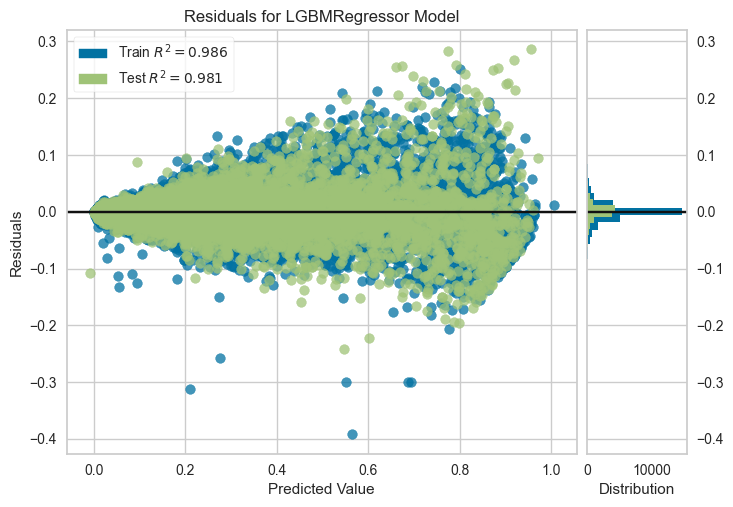

In [215]:
plot_model(model)

Vemos que la distribucion los residuos es muy similar, por lo que no existe mucha diferencia entre los valores predichos y los reales.

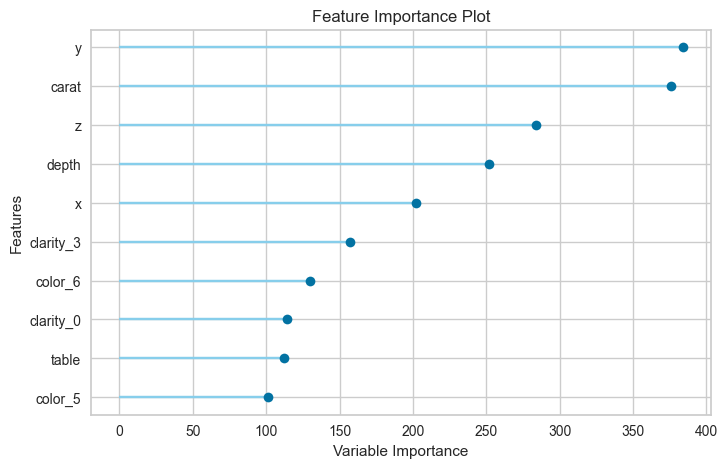

In [216]:
plot_model(model,'feature')

Tal y como se vió en el mapa de calor, las variable más importantes terminaron siendo el peso y las dimensiones del diamante.

### Evaluacion con Pycaret

In [217]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [218]:
tune_model = tune_model(model)
print(tune_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0202,0.0014,0.0375,0.9690,0.0249,0.2279
1,0.0205,0.0015,0.0386,0.9673,0.0253,0.2412
2,0.0219,0.0017,0.0416,0.9652,0.0271,0.2336
3,0.0204,0.0014,0.0381,0.9702,0.0248,0.2396
4,0.0202,0.0014,0.0380,0.9698,0.0253,0.2372
5,0.0206,0.0013,0.0367,0.9700,0.0248,0.2336
6,0.0213,0.0015,0.0392,0.9667,0.0258,0.2294
7,0.0214,0.0016,0.0397,0.9675,0.0263,0.2765
8,0.0195,0.0012,0.0344,0.9737,0.0234,0.2364


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
LGBMRegressor(n_jobs=-1, random_state=42)


In [220]:
pred_1 = predict_model(tune_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0156,0.0009,0.0294,0.9813,0.0195,0.1400


Alcanzamos un R2 de 98,13%, mejorando el primer resultado del Random Forest Regressor de 98,04%, Light Gradient Boosting Machine termina siendo un modelo que mejor prediccion y menor margen de error tiene.

In [221]:
pred_1

,carat,depth,table,x,y,z,clarity_0,clarity_1,clarity_2,clarity_3,...,color_4,color_5,color_6,cut_0,cut_1,cut_2,cut_3,cut_4,price,prediction_label
31622,0.020790,0.525000,0.269231,0.400372,0.073345,0.083962,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.006704,0.011104
7788,0.145530,0.552778,0.250000,0.567039,0.103905,0.120755,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.214089,0.206898
6114,0.118503,0.516667,0.230769,0.547486,0.100340,0.114151,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.197546,0.180612
15453,0.228690,0.419444,0.307692,0.669460,0.121562,0.131132,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.316916,0.310946
44931,0.064449,0.561111,0.326923,0.469274,0.085908,0.100314,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.070660,0.073524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52314,0.006237,0.419444,0.307692,0.380819,0.068421,0.074214,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.012110,0.005991
2070,0.116424,0.555556,0.307692,0.539106,0.097793,0.114465,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.150349,0.150594
33145,0.022869,0.558333,0.250000,0.403166,0.073854,0.086164,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.026491,0.025491
47681,0.064449,0.525000,0.269231,0.479516,0.086418,0.099686,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.084122,0.077339


In [222]:
X_test.shape

(10788, 26)

In [223]:
y_test.shape

(10788, 1)

In [224]:
data_unseen = X_test.join(y_test)
data_unseen

,carat,depth,table,x,y,z,clarity_0,clarity_1,clarity_2,clarity_3,...,color_3,color_4,color_5,color_6,cut_0,cut_1,cut_2,cut_3,cut_4,price
11336,0.168399,0.575000,0.269231,0.595903,0.107810,0.127673,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.252095
1687,0.106029,0.555556,0.269231,0.527933,0.096774,0.112579,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.146348
32387,0.024948,0.475000,0.288462,0.410615,0.075382,0.083648,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.025139
34437,0.054054,0.500000,0.288462,0.468343,0.084380,0.095912,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.029032
10756,0.168399,0.552778,0.307692,0.594041,0.106961,0.125472,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.244742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059,0.012474,0.555556,0.288462,0.379888,0.069779,0.081132,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.014651
52855,0.081081,0.475000,0.307692,0.508380,0.092020,0.102830,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.121749
34063,0.033264,0.547222,0.269231,0.427374,0.077080,0.089937,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.028383
9464,0.168399,0.391667,0.307692,0.619181,0.113582,0.119811,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.231064


In [225]:
final_pred = predict_model(model, data=data_unseen)
final_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0160,0.0009,0.0301,0.9801,0.0201,0.1407


,carat,depth,table,x,y,z,clarity_0,clarity_1,clarity_2,clarity_3,...,color_4,color_5,color_6,cut_0,cut_1,cut_2,cut_3,cut_4,price,prediction_label
11336,0.168399,0.575000,0.269231,0.595903,0.107810,0.127673,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.252095,0.248114
1687,0.106029,0.555556,0.269231,0.527933,0.096774,0.112579,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.146348,0.146107
32387,0.024948,0.475000,0.288462,0.410615,0.075382,0.083648,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.025139,0.030521
34437,0.054054,0.500000,0.288462,0.468343,0.084380,0.095912,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.029032,0.018262
10756,0.168399,0.552778,0.307692,0.594041,0.106961,0.125472,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.244742,0.260806


Para las pruebas con datos no vistos tenemos un R2 de 98,08%, por lo que termina rindiendo casi similar que como el conjunto de entrenamiento. Se decide elegir este modelo para predecir los precios del diamante.